<a href="https://colab.research.google.com/github/vincent-arese/PythonConfigVA/blob/main/PyFctVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="00CED1">  Config Env de travail </font>   <a id="EnvTravail"></a>

### pip install

In [1]:
# Prepa Env PIP
# librairie pour combiner Pyhton & SQL https://towardsdatascience.com/fugue-and-duckdb-fast-sql-code-in-python-e2e2dfc0f8eb
#!pip install -U fugue[duckdb,sql] 
# !pip install pandas-bokeh

#  TO DEL    !pip install -U dash 

# !python --version  # checks version from command line
# !sudo apt-get update -y
# !sudo apt-get upgrade -y

# ! pip list -v
# ! pip list -v | grep [Pp]an 
# ! pip list -v | grep [Pp]lot
# ! pip list -v | grep [Ss]ea
# ! pip list -v | grep [Bb]l
# ! pip list -v | grep [Aa]ut
# ! pip install --upgrade pandas

# !sudo update-alternatives --config python3
# #after running, enter the row number of the python version you want.
# !python --version  # checks version from command line

### Librairies

In [2]:
# librairies Pythons 
import numpy as np
import pandas as pd  #https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
from pandas.core.groupby.generic import DataFrameGroupBy
pd.set_option('display.max_columns',None)  #pd.set_option('max_columns', 10) limiter le nbr de colonnes visualisé à 10 /none (=> scrollbar)
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_colwidth', None)  # None ou -1 or  199
pd.set_option('display.colheader_justify','left') #'left'/'right'
pd.set_option("display.date_dayfirst",True) # display.date_dayfirst / display.date_yearfirst
pd.set_option("display.date_yearfirst",False) 
pd.set_option("display.html.table_schema", True)
pd.set_option("display.html.table_schema", True) # test ?


# pd.set_option("mode.sim_interactive", True)  # Mode debogage ! ??????????
# https://pandas.pydata.org/docs/user_guide/options.html
# https://runebook.dev/fr/docs/pandas/user_guide/options

import scipy.stats as stats   # https://github.com/scipy/scipy

import statsmodels.api as sm   #https://www.statsmodels.org/stable/index.html  #https://www.statsmodels.org/dev/user-guide.html
import statsmodels.formula.api as smf #https://www.statsmodels.org/stable/index.html
from patsy import dmatrices

import matplotlib.pyplot as plt    #https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf
import seaborn as sns     #https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
import plotly.express as px     #https://plotly.com/python/ 
import plotly.graph_objects as go  #https://plotly.github.io/plotly.py-docs/search.html?q=hist&check_keywords=yes&area=default 
# import pandas_bokeh
#import fugue_duckdb
#from fugue_notebook import setup ;setup()

#_____________________________________________________________________________
# Python print Color
class pcolors:
    OK = '\033[92m' #GREEN
    WARNING = '\033[93m' #YELLOW
    FAIL = '\033[91m' #RED
    RESET = '\033[0m' #RESET COLOR
    BLUE = '\033[94m'
    BLUEBG = '\033[104m'

#Source : https://www.delftstack.com/fr/howto/python/python-print-colored-text/  AINSI colors

#Exemple 
print(pcolors.OK + "File Saved Successfully!" + pcolors.RESET)
print(pcolors.WARNING + "Warning: Are you sure you want to continue?" + pcolors.RESET)
print(pcolors.FAIL + "Unable to delete record." + pcolors.RESET)

print(f"{pcolors.OK}File Saved Successfully!{pcolors.RESET}")
print(f"{pcolors.WARNING}Warning: Are you sure you want to continue?{pcolors.RESET}")
print(f"{pcolors.FAIL}Unable to delete record.{pcolors.RESET}")
print(f"{pcolors.BLUEBG}Unable to delete record.{pcolors.RESET}")
#-----------------------------------------------------


#  Importer les données en Pandas dataframe
#aideDataPATH='/content/drive/MyDrive/DataSc/P4VA/'
DataPATH='https://raw.githubusercontent.com/vincent-arese/OC-P6'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


File Saved Successfully!
Unable to delete record.
File Saved Successfully!
Unable to delete record.
Unable to delete record.


## Fonctions Perso

#### <font color="red"> Cellules de bloc-notes template </font>


* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

* https://colab.research.google.com/drive/1-mfcGT9FvROM6pOL2_uNtx4ywrf6IlBn#scrollTo=icxtjOVUqN7F

* https://html-color-codes.info/Codes-couleur-HTML/

* https://docs.bokeh.org/en/latest/docs/gallery.html


In [3]:
#########################################################################
# DEBUG & Search !      Version 1.1                                     #
#########################################################################
# dt=BilanAlim
# col=['index']

# dt.info()
# dt.describe(include='all')
# dt.describe(include='category')

#~~Search NaN ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# SearchNaN(dt,1)
# dt.isnull().sum().sum()  # Is nul total df 
# SearchNaN(dt,2)
# SearchNaN(dt,2).CodeZone.sort_values(na_position='first').unique()
# len(SearchNaN(dt,2).CodeZone.sort_values(na_position='first').unique())
# SearchNaN(dt,2).Zone.sort_values(na_position='first').unique()
# SearchNaN(dt,2).Année.sort_values(na_position='first').unique()

# dt.replace([np.inf, -np.inf], np.nan, inplace=True) # Remplacer les infini par des NaN (division ! )

#~~Search values ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# SearchListe(dt,[0])
# SearchListe(dt,[0,np.nan,np.inf,-np.inf])
# SearchListe(dt,[ 1, 249, 250, 273, 276, 351])
# SearchListe(dt,[0]).CodeZone
# dt.CodeZone.sort_values(ascending=True,na_position='first').unique()
# dt.iloc[:,12].sort_values(ascending=True,na_position='first').unique()
#  dt.iloc[:,2].unique()
# dt.iloc[:,3:19]
# dt.AlphaISO3.sort_values(ascending=True,na_position='first').unique()
# len(dt.AlphaISO3.sort_values(ascending=True,na_position='first'))



#__Liste valeur unique dans chaque colonne du df  _____________
# for col in ListeCol: 
#   # print(col,':',len(dt[col].unique()),': \n',dt[col].sort_values(ascending=True,na_position='first').unique(),'\n______________\n')
#   print(col,':',len(dt[col].unique()),': \n',dt[col].unique(),'\n______________\n') #Unsorted
#-----------

#~~ Différences liste ou df ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LostElement(A_array,B_array)
# get_different_rows(source_df, new_df)
# ListeColUnique(dt)


#~~ Différences liste ou df ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# df=dt
# regex="^[Tt]h.*"
# df[df.Zone.str.contains(regex)]
#-----------


#~~ Dtype ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# 0.  # dtype Category => object (str)
# reduce_mem_usage(dt) # Optisation dtype
#__iloc dtype change ____________________
# for i in range(2,5):
#   dt.iloc[:,i]=dt.iloc[:,i].astype(float)
#-----------

#------ test Erreur dtype trop Petit: 

# print('Min',dt[col].min(),'Moy',dt[col].mean(),'Max',dt[col].max(),'Sum',dt[col].sum())  


# dt.info()

##### Df List
# SecuAlimGeo

##################### Aide memoire ##################
# [i for i in range(2,12)]

# dt.iloc[:, [2,3,12,14,15]]
# dt.iloc[:,[i for i in range(18)]],2)

# ColMove(df,ColName,ColIndex)
# df= df.iloc[:,[0,1,2,3,7,12,16]]
# o
####################################################


# print(BilanAlimGeo.Semences.max(),BilanAlimGeo.Semences.mean(), BilanAlimGeo.Semences.min(),BilanAlimGeo.Semences.sum(),BilanAlimGeo.Semences.count())
# !cat /proc/meminfo # Voir RAM

In [4]:
#########################################################################
# DEBUG & Compare Sum      Version 1.01                                 #
#########################################################################

df = pd.DataFrame({'num': [1, 2, 3], 'colors': ['red', 'white', 'blue']})
#_____________________________________________________________
# Parametre Compare Somme
dfREF=df
RechercheTest="num>0"
listeCol=dfREF.columns   # listeCol=dfREF.columns # pour filter toutes les colonnes de dfREF

df1=dfREF
df1TEXTE='Version1'

df2=dfREF
df2TEXTE='Version2'
# Itere  listeCol pour chaque df(n) et teste somme df(n) = somme dfREF 
#-------------------------------------------

for Col in listeCol:
  Col_type = dfREF[Col].dtype
  if Col_type != object and Col_type != "category":  #  Si le dtype != object & category => de type Nombre ! 
    if Col in df1.columns:   
      Test1=df1.query(RechercheTest)[Col].sum()
    if Col in df2.columns:
        Test2=df2.query(RechercheTest)[Col].sum()

    Ref=dfREF.query(RechercheTest)[Col].sum()
    if Test1!=Ref or Test2!=Ref:
       print(dfREF.columns.get_loc(Col),'~',Col,'~dtype(',Col_type,')   ', df1TEXTE,':',Test1==Ref,' - ',df2TEXTE,':',Test2==Ref)
    else:
      print(dfREF.columns.get_loc(Col),'~',Col,pcolors.OK +'~dtype(',Col_type,')  : Somme  Ok'+ pcolors.RESET)  # La somme  colonne est identique 
  else:
    Test1un=0
    Test2un=0
    if Col in df1.columns:   
      Test1un=df1.query(RechercheTest)[Col].unique().sum()
    if Col in df2.columns:
      Test2un=df2.query(RechercheTest)[Col].unique().sum()

    Refun=dfREF.query(RechercheTest)[Col].unique().sum()
    if Test1un != Refun or Test2un != Refun:
      print(dfREF.columns.get_loc(Col),'~',Col,'~dtype(',Col_type,')   ', df1TEXTE,':',Test1un==Refun,' - ',df2TEXTE,':',Test2un==Refun)
    else:
      print(dfREF.columns.get_loc(Col),'~',Col,pcolors.OK +'~dtype(',Col_type,')  : Concat OK'+ pcolors.RESET)   # La somme (textes concaténés)  colonne est identique 

#_FIN______________________________________________________

0 ~ num ~dtype( int64 )  : Somme  Ok
1 ~ colors ~dtype( object )  : Concat OK


#### Liste Fonctions 

### Search 

In [5]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name
#source : https://stackoverflow.com/questions/31727333/get-the-name-of-a-pandas-dataframe   Pour les series utiliser .name  (ou .names )

##### Search NaN  SearchNaN(DataFrame,Option)

In [6]:
#Fonction ChercheNaN : Recherche des NaN
def SearchNaN(DataFrame,Option):
  """ChercheNaN : Recherche des NaN
  
  Option : 
  1: Total nombre de NaN par colonne
  2: Afficher les lignes ayant au moins 1 NaN
  3: Nomnbre de lignes ayant 1 NaN
  """
  df_name = get_df_name(DataFrame)

  Nanrecap = pd.DataFrame(df.isnull().sum(axis=0),columns=['Nbr_NaN'])
  Nanrecap["%-NaN"] = (Nanrecap.Nbr_NaN/len(df))*100
  Nanrecap.sort_values(by='Nbr_NaN', ascending=True, inplace=True)

  if Option==1:
   print(pcolors.OK+ df_name +pcolors.RESET,': Nombre de NaN par colonne',DataFrame.shape) 
   print(Nanrecap)
   
    #  Option1 : Total nombre de NaN par colonne
  elif Option==2:
    return DataFrame[DataFrame.isnull().any(axis=1)]  #Afficher les lignes ayant au moins 1 NaN
  elif Option==3: 
    return print(pcolors.OK+ df_name +pcolors.RESET,': Nombre de ligne(s) ayant au moins 1 NaN :',
                 len(DataFrame[DataFrame.isnull().any(axis=1)]),'\n-----%------\n',
                 (len(DataFrame[DataFrame.isnull().any(axis=1)])/len(DataFrame))*100)
  else:
    print("SearchNaN(DataFrame,Option) Error :","Choisir Option :\n",
          "\n 1: Total nombre de NaN par colonne",
          "\n 2: Total nombre de NaN par colonne",
          "\n 3: Nomnbre de lignes ayant 1 NaN")

# DEBUG  recherche NaN
# temp=geo
# temp.isnull().sum(axis=0) #  Option1 : Total nombre de NaN par colonne
# test=temp[temp.isnull().any(axis=1)] ; test #Afficher les lignes ayant au moins 1 NaN
# len(test)
# test.Zone.unique()

##### SearchListe(df,liste)

In [7]:
# Recherche une liste dans un DataFrame
def SearchListe(df,liste):
  """Recherche une liste dans un DataFrame et renvoie Df avec les Valeur pour masque SearchListe(dx,[2,4,7]) - liste=[2,4,7]/ SearchListe(dx,liste) accepte liste unique liste=[1]"""
  return df[df.isin(liste)].dropna(thresh=1)

# Exemple : 
# dx = pd.DataFrame(np.random.randint(10, size=(10, 3)),
#                      columns=['A', 'B', 'C'])
# dx
# SearchListe(dx,[2,4,7])
# liste=[2,4,7]
# SearchListe(dx,liste)
# SearchListe(dx,l)

##### ListeCol Unique

In [8]:
def ListeColUnique(df):
  """ Itere sur les colonnes d'un DataFrame(df) et listes les valeurs unique de chaque colonne"""
  ListeCol = df.columns
  df_name = get_df_name(df)
  print(ListeCol)
  for col in ListeCol: 
     print(col,':',len(df[col].unique()),': \n',df[col].sort_values(ascending=True,na_position='first').unique(),'\n______________\n')

##### SearchKey(df)

In [9]:
def SearchKey(df):
  """ Itere sur les colonnes d'un DataFrame(df) et Compte les valeurs uniques de chaque colonne"""
  ListeCol=df.columns
  df_name = get_df_name(df)
  # print('Liste colonnes :',pcolors.OK +ListeCol+ pcolors.RESET)
  print('\n______________________________________________________________________________________\n',
        "Recherche  valeurs uniques : ",
        pcolors.WARNING+ df_name +pcolors.RESET," ",
        # df.shape,
        "(",len(df),"Lignes,",len(ListeCol),"Colonnes)",
        '\n______________________________________________________________________________________')
  for col in ListeCol: 
    NbUnique=df[col].nunique()
    Nbdoublons=len(df)-NbUnique
    if Nbdoublons==0:
      print(pcolors.OK +col,":"+pcolors.RESET,len(df),"rows",
          "|Nb unique:",NbUnique,
          "|Nb doublons:", Nbdoublons, "-",
          np.round(((len(df)-NbUnique)/len(df))*100,0),'%',
          pcolors.OK+"Clé candidate"+pcolors.RESET,
          "|",df[col].dtype,
          '\n____________________________________________________________________________________')
    elif Nbdoublons!=0:
      print(pcolors.OK+col,":"+pcolors.RESET,len(df),"rows",
          "|Nb unique:",NbUnique,
          "|Nb doublons:", Nbdoublons, "-",
          np.round(((len(df)-NbUnique)/len(df))*100,0),'%', 
          "|",df[col].dtype,     
          '\n______________________________________________________________________________________')

In [10]:
def INFOS(df):
  """ Info sur un  DataFrame df """
  ListeCol=df.columns
  df_name = get_df_name(df)

  INFOdf = pd.DataFrame(columns = ['Colonne','Nb_Unique' , 'Nb_Doublons', 'D_%', 'DataType', 'nbr_NaN', 'NaN_%','Clé'])

  # print('Liste colonnes :',pcolors.OK +ListeCol+ pcolors.RESET)
  print('\n______________________________________________________________________________________\n',
        " Info DataFrame  : ",
        pcolors.WARNING+ df_name +pcolors.RESET," ",
        # df.shape,
        "(",len(df),"Lignes,",len(ListeCol),"Colonnes)",
        '\n---------------------------------------------------------------------------------------\n')
  
  for col in ListeCol: 
    NbUnique = df[col].nunique()
    Nbdoublons = len(df[col])-NbUnique
    DoublonsP = np.round(((len(df[col])-NbUnique)/len(df[col]))*100,0) # doublons %
    if Nbdoublons == 0:
     commentaire = "clé"
    else:
      commentaire = "-"
 
    NaNsum = df[col].isnull().sum(axis=0) # Nomnbre de Nan par colonne
    NanPP = np.round((NaNsum /len(df[col]))*100,3)

    new_list = [ ( col, NbUnique, Nbdoublons, DoublonsP, df[col].dtype , NaNsum, NanPP , commentaire )] # Nouvelle ligne par colonne 
    New = pd.DataFrame( new_list, columns = ['Colonne','Nb_Unique' , 'Nb_Doublon', 'D_%', 'DataType', 'nbr_NaN', 'NaN_%','Clé']) # DataFrame Colonne    
    INFOdf = INFOdf.append(New,ignore_index=True) # Ajout de la ligne correspondant à la colonne
      
  print(INFOdf)
  # return INFOdf
 
  print('\n clé : clé candidate \n______________________________________________________________________________________\n')
 

In [11]:
def INFOSdf(df):
  """ Info sur un  DataFrame df """
  ListeCol=df.columns
  df_name = get_df_name(df)

  INFOdf = pd.DataFrame(columns = ['Colonne','Nb_Unique' , 'Nb_Doublons', 'D_%', 'DataType', 'nbr_NaN', 'NaN_%','Clé'])

  # print('Liste colonnes :',pcolors.OK +ListeCol+ pcolors.RESET)
  print('\n______________________________________________________________________________________\n',
        " Info DataFrame  : ",
        pcolors.WARNING+ df_name +pcolors.RESET," ",
        # df.shape,
        "(",len(df),"Lignes,",len(ListeCol),"Colonnes)",
        '\n---------------------------------------------------------------------------------------\n')
  
  for col in ListeCol: 
    NbUnique = df[col].nunique()
    Nbdoublons = len(df[col])-NbUnique
    DoublonsP = np.round(((len(df[col])-NbUnique)/len(df[col]))*100,0) # doublons %
    if Nbdoublons == 0:
     commentaire = "clé"
    else:
      commentaire = "-"
 
    NaNsum = df[col].isnull().sum(axis=0) # Nomnbre de Nan par colonne
    NanPP = np.round((NaNsum /len(df[col]))*100,3)

    new_list = [ ( col, NbUnique, Nbdoublons, DoublonsP, df[col].dtype , NaNsum, NanPP , commentaire )] # Nouvelle ligne par colonne 
    New = pd.DataFrame( new_list, columns = ['Colonne','Nb_Unique' , 'Nb_Doublons', 'D_%', 'DataType', 'nbr_NaN', 'NaN_%','Clé']) # DataFrame Colonne    
    INFOdf = INFOdf.append(New,ignore_index=True) # Ajout de la ligne correspondant à la colonne
      
  # print(INFOdf)
  return INFOdf
 
  print('\n clé : clé candidate \n______________________________________________________________________________________\n')
 

##### np.Array  LostElement(Array1,Array2)

In [12]:
# Rechercher un élément perdu à partir d’un tableau dupliqué 
def LostElement(A,B):
  """Rechercher un élément perdu à partir d’un tableau dupliqué
    LostElement(ArrayA,ArrayB)  ou LostElement(df.A.unique(),df.B.unique())
    Compare deux np.array !!!!
      =>  DifférenceA=>B  : Valeur incluse dans A mais Non dans B 
      =>  DifférenceB=>A  : Valeur incluse dans B mais Non dans A
  """

  # return print('ArrayA:',A,'- Nb val:',len(A),'\n ArrayB:',B,'- Nb val:',len(B),pcolors.OK + '\n----------------------\n Différence inA=>notB',np.setdiff1d(A, B),'\n----------------------\n Différence inB=>notN',np.setdiff1d(B, A),'\n----------------------\n'+ pcolors.RESET)
  return print('\n----------------------\n',
               pcolors.OK +'Diff. inA=>notB'+ pcolors.RESET,np.setdiff1d(A, B),'\n----------------------\n',
               pcolors.OK+'Diff. inB=>notA'+ pcolors.RESET,' ',np.setdiff1d(B, A),'\n----------------------\n',
               pcolors.OK +'ArrayA:'+ pcolors.RESET,A,'- Nb val:',len(A),'\n',
               pcolors.OK +'\n ArrayB:'+ pcolors.RESET,B,'- Nb val:',len(B),'\n----------------------\n')

##### Différences entre deux df get_different_rows(source_df, new_df)



In [13]:
def get_different_rows(source_df, new_df):
    """Returns just the rows from the new dataframe that differ from the source dataframe"""
    merged_df = source_df.merge(new_df, indicator=True, how='outer')
    changed_rows_df = merged_df[merged_df['_merge'] == 'right_only']
    return changed_rows_df.drop('_merge', axis=1)


#Trouver les lignes peu communes entre deux DataFrames
# pd.concat([SecuAlimGeo,SecuAlim]).drop_duplicates(keep=False)


### Manip DataFrame

##### ColMove(df,ColName,ColIndex)

In [14]:
# Deplacer une colonne dans un dataframe 
def ColMove(DataFrame,ColName,ColIndex):
  """Fonction  ColMove(DataFrame,ColName,ColIndex)  
   Deplace un colonne dans un DataFrame  - ColName : nom colonne  - ColIndex : rang index souhaité (ddbut df 0 !)
  """ 
  DataFrame.insert(ColIndex,'Xcol',DataFrame[ColName])
  DataFrame.drop(ColName, axis=1, inplace=True)
  DataFrame.rename(columns={'Xcol' : ColName},inplace=True)
  return DataFrame

##### DFScol([dfA,dfB,dfC,dfD])  Info listeDF

In [15]:
def DfListeCol(ListeDF):
 """ Liste les colonnes & shape  d'une liste de dataframe 
 DFScol([dfA,dfB,dfC,dfD])"""

 print(pcolors.WARNING + 'DataFrame : Liste des colonnes & shape '+pcolors.RESET)

 # DF_Liste = [transactions,products,customers]
 DF_Liste = ListeDF
 for DF in DF_Liste: 
  print('\n--------------------------------`\n', 
        pcolors.OK+get_df_name(DF)+ " :" +pcolors.RESET,DF.columns,pcolors.OK+"", DF.shape,"" +pcolors.RESET)
 print('\n--------------------------------`\n')

##### MergeAudit(df)

In [16]:
def MergeAudit(df): 
  print("\n---------------------------------------------------------------------------")
  print(pcolors.BLUE+"MergeAudit : "+pcolors.RESET,df._merge.unique())

  print(pcolors.WARNING+'right_only :'+pcolors.RESET,df[df._merge=='right_only'].shape) #(22, 9)
  # Merge_right_only = df[df._merge=='right_only']

  print(pcolors.WARNING+'left_only :'+pcolors.RESET,df[df._merge=='left_only'].shape) # (244, 9)
  # Merge_left_only = df[df._merge=='left_only']

  print(pcolors.OK+'both :'+pcolors.RESET,df[df._merge=='both'].shape) # (679111, 9)
  # Merge_both = df[df._merge=='both']

  print("---------------------------------------------------------------------------")
  INFOS(df)
 
  Merge_right_only = df[df._merge=='right_only']
  Merge_left_only = df[df._merge=='left_only']
  Merge_both = df[df._merge=='both']
  # return Merge_both.head(5) 
 

### Manip Date

In [17]:
# Eclater date en colonnes  Journée - Jour - Mois - Année - Trimestre 

# data['date_naissance'] = pd.to_datetime(data['date_naissance'],format='%d/%m/%Y', errors='coerce')

#https://docs.python.org/fr/3/library/datetime.html#strftime-and-strptime-format-codes 
#https://docs.python.org/3/library/datetime.html

#dtype  DataTime  : '<M8[ns]'

In [18]:
def DateTime2Week(df,DateColSTR) : 

  get_df_name(df)
  # date = "DateColSTR"

  #Conversion colonne date  au format datetime 
  df[DateColSTR] = pd.to_datetime(df[DateColSTR])
  df["weekdayNum"]=df[DateColSTR].dt.weekday
  #https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html
  #=> The day of the week with Monday=0, Sunday=6 & translate in French 
  conditionlist = [
                 df["weekdayNum"] == 0,
                 df["weekdayNum"] == 1,
                 df["weekdayNum"] == 2,
                 df["weekdayNum"] == 3,
                 df["weekdayNum"] == 4,
                 df["weekdayNum"] == 5,
                 df["weekdayNum"] == 6]
                
  choicelist = ['Lundi','Mardi','Mercredi',"Jeudi","Vendredi","Samedi","Dimanche"]
  df["weekday"] = np.select(conditionlist, choicelist, default='?')
  df["weekday"] = df["weekday"].astype('category') #Optimisation dtype 

  df["weekdayNum"] = df["weekdayNum"]+ 1 # Numerotation FR (Lundi 1 dimanche 7)

  # df["weekdayEN"] = df["date"].dt.day_name() #Ok mais en Anglais  sur Colab! 
  # df["weekdayEN"] = df["date"].dt.day_name(locale='French') 

  df['weeknum'] = df[DateColSTR].apply(lambda x:x.isocalendar()[1]).astype(np.int8) #Numéo de Semaine
  df.sort_values(by=[DateColSTR], inplace=True)
  return df

  # https://pandas.pydata.org/docs/user_guide/timeseries.html
  # https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
 # https://docs.python.org/fr/3.7/library/datetime.html


In [19]:
def DateTime2YMDQ(df,DateColSTR) : 

 get_df_name(df)
 #  date = "DateColSTR"
 #Conversion colonne date  au format datetime 
 df[DateColSTR] = pd.to_datetime(df[DateColSTR])


 # df["DateCourte"]=pd.to_datetime(df["DateCourte"],dayfirst=True)
 df['YearQuarter'] = df[DateColSTR].dt.to_period('Q')

 df["Year"] = df[DateColSTR].dt.year.astype(np.int16)
 df["Month"] = df[DateColSTR].dt.month.astype(np.int8)
 df["Day"] = df[DateColSTR].dt.day.astype(np.int8)
 
 df['QuarterNum'] = (df["Month"] - 1) // 3 + 1
 
 df.sort_values(by=[DateColSTR], inplace=True)
 return df

  # https://pandas.pydata.org/docs/user_guide/timeseries.html
  # https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
  # https://docs.python.org/fr/3.7/library/datetime.html


### Data type Optimisation

##### Change dtype Category to Object : dtypeCat2Obj(df)

In [20]:
def dtypeCat2Obj(df):
    """  iterate through all the columns of a dataframe and 
    modify the Dtype Catergory to Object (Str)       
    """
     
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type == 'category':
             df[col] = df[col].astype(str)    
           
    return df

##### ReduceMemUsage reduce_mem_usage(df)

In [21]:
# Drastically reduce df RAM usage ! 
#I don't know who the original author of this function but many thanks to him ;) 
#source : https://towardsdatascience.com/how-to-learn-from-bigdata-files-on-low-memory-incremental-learning-d377282d38ff
def reduce_mem_usage(df):
    """ 
    iterate through all the columns of a dataframe and 
    modify the data type to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(('Memory usage of dataframe is {:.2f}' 
                     'MB').format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
                
        if col_type != object :
        # if col_type != object | col_type != "datetime64[ns]" | col_type != "period[Q-DEC]":
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max <\
                  np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max <\
                   np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max <\
                   np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max <\
                   np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max <\
                   np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max <\
                   np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            if col_type == object : 
             df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024**2
    print(('Memory usage after optimization is: {:.2f}' 
                              'MB').format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) 
                                             / start_mem))
    
    return df

    # Attention ne fct pas si le df à optimizer contient un type 'category'
  #Code ...........
    # df.info(memory_usage=True)
    # DataFrame.memory_usage(index=True, deep=False)

    #Ajouter gestion des data types suivants : 
    # datetime64[ns]  a tester
    # period[Q-DEC]  a tester

###### dtype Min-Max

In [22]:
pd.DataFrame.from_dict(
{'np.int8:':[np.iinfo(np.int8).min, np.iinfo(np.int8).max],
'np.int16:':[np.iinfo(np.int16).min, np.iinfo(np.int16).max],
'np.int32:':[np.iinfo(np.int32).min, np.iinfo(np.int32).max],
'np.int64:':[np.iinfo(np.int64).min, np.iinfo(np.int64).max],
'np.float16:':[np.finfo(np.float16).min, np.finfo(np.float16).max],
'np.float32:':[np.finfo(np.float32).min, np.finfo(np.float32).max],
'np.float64:':[np.finfo(np.float64).min, np.finfo(np.float64).max]})

## info complementaire https://towardsdatascience.com/reducing-memory-usage-in-pandas-with-smaller-datatypes-b527635830af

,np.int8:,np.int16:,np.int32:,np.int64:,np.float16:,np.float32:,np.float64:
0,-128,-32768,-2147483648,-9223372036854775808,-65504.0,-3.402823e+38,-1.797693e+308
1,127,32767,2147483647,9223372036854775807,65504.0,3.402823e+38,1.797693e+308


##### MultiDOWN ( Conversion multi-index  à index simple)

In [23]:
#Fonction multiDOWN : Conversion df_MultiIndex to df_indexSimple
def multiDOWN(DataFrame):
  """Fonction multiDOWN(DataFrame) : Conversion DataFrame_MultiIndex to DataFrame_indexSimple"""
  DataFrame=DataFrame.columns=DataFrame.columns.to_flat_index() # colonnes => concatener le multi index en un index simple https://datascientyst.com/flatten-multiindex-in-pandas/
  DataFrame.reset_index(inplace=True) # Conversion Index en colonnes simple.
 



##### FlatIndex(df) ( Conversion multi-index  à index simple)

In [24]:
def FlatIndex(df):
 """ Flat  multi-index datatFrame & rename columns in one word name """

 #  Step I : Convert muli-index  to simple index DataFrame
 df.columns = df.columns.to_flat_index() # colonnes => concatener le multi index en un index simple https://datascientyst.com/flatten-multiindex-in-pandas/
 df = df.reset_index() # Conversion Index en colonne simple


 #  Step II : renane DataFrame columns with one word name ! 
 import re
 NewListCol=["alpha"]  # temp new name columns list 

 for ColName in  df.columns:   # simplify colum names 
  string = str(ColName)
  string = re.sub("\(|\)|\'","",string).replace('"', '').replace(" ", "").replace(",", "_") # subtitute and replace specific caracters
  # print(string)
  NewListCol= np.append(NewListCol, string)

 NewListCol = np.delete(NewListCol,0)   # delete  "alpha"  from NewListCol
 # NewListCol 

 df.columns = NewListCol  # alocate new columns names 

 return df

### Fonction Satistiques

##### PercentCumul(df,Col) Calcul % cumulé

In [25]:
# Tri ordre decroissant puis ajoute Colonnne avec Calcul % cumulé pour identifier 20/80 ou 80/20 
def PercentCumul(df,Col):
  """ Tri ordre decroissant puis ajoute Colonnne Col_cum% avec Calcul % cumulé pour identifier facilement 20/80 ou 80/20 """
  df=df.sort_values(by=[Col],ascending=False)
  df[Col+'_percent']=(df[Col]/df[Col].sum()) * 100
  df[Col+'cum_p']=(df[Col].cumsum() / df[Col].sum()) * 100
  df[Col+'_percent']=df[Col+'_percent'].round(2)
  df[Col+'cum_p']=df[Col+'cum_p'].round(2)
 
  # df=df.sort_values(by=[Col+'cum_%'],ascending=False)
  
  return df


# Cf cumsum() pour  SommeCumulée
 #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html 


 # Aller plus loing  Pareto :  https://commentprogresser.com/outil-pareto.html
 # ABC  
 #  s'agit d'une variante des 20/80 qui propose cette fois-ci un découpage en 3 segments.
 #   Classe A : 20% des causes représentent 80% des effets.
 #   Classe B : 30% des causes représentent 15% des effets.
 #   Classe C: 50% des causes représentent 5% des effets.


#### Moyenne Pondérée 

In [26]:
# Calcul Moyenne Pondérée / Weighted Average

def MoyPonderee(df, Colvalues, Colweights):
  """ Moyenne Pondérée / Weighted Average
    df: DataFrame  - Colvalues : Col Valeurs  - Colweights : Col. Poids relatif 
  Peut être utlisée avec un Groupby : df.groupby('Year').apply(MoyPonderee, 'Grades', 'NumCourses')
  Source :  Rework of https://datagy.io/pandas-weighted-average/ 
  """
  return sum(df[Colweights] * df[Colvalues]) / df[Colweights].sum()


# Source Rework of https://datagy.io/pandas-weighted-average/ 

#### QartileIndicatorCol(df,col) Ajout Colonne quartile

In [27]:
# Quartile (Ajout colonne conditionnelle quartile) & Outliers methode Interquartiles V2 

def QartileIndicatorCol(df,col): 
  """ Ajout d'un colonne Conditionelle avec le quartile au df courant  & Recherce Ouliers Methode IQ ( InterQuartiles)
QartileIndicatorCol(df,col) => df[col+"Quartile"] """

  # Caculs Seuils des quartiles 
  q25=df[col].quantile(q=0.25, interpolation='linear')  #Q1
  q50=df[col].quantile(q=0.50, interpolation='linear')  #Q2
  q75=df[col].quantile(q=0.75, interpolation='linear')  #Q3

  Q1=q25 ;   Q2=q50 ;   Q3=q75 # Quartiles simplifiés

  # Quartiles Conditions & label 
  conditionlist = [
    (df[col] <= q25) ,
    (df[col] > q25) & (df[col] <q75),
    (df[col] >= q75)]
   
  choicelist = ['quartile1','quartile2','quartile3']

  df[col+"_Quartile"] = np.select(conditionlist, choicelist, default='Not Specified')
  df[col+"_Quartile"] = df[col+"_Quartile"].astype('category')

  # écart interquartile
  EcartInterquartile  = Q3 - Q1  # IQ = Q3 - Q1
  TauxIQoutliers = 1.5
  IQoutliersInf = Q1 -  TauxIQoutliers *  EcartInterquartile # Outliers Inférieurs ?
  IQoutliersSup = Q3 +  TauxIQoutliers *  EcartInterquartile # Outliers ISuperieur ? 

 # IQ Conditions & label 
  conditionlist = [
   (df[col] <  IQoutliersInf) ,
   (df[col] >=  IQoutliersInf) & (df[col] <= IQoutliersSup),
   (df[col] > IQoutliersSup)    ]
  
  choicelist = ['IQ_Ouliers_Inf','-','IQ_Ouliers_Sup'] 

  df[col+"_IQ_Ouliers"] = np.select(conditionlist, choicelist, default='Not Specified')
  df[col+"_IQ_Ouliers"] = df[col+"_IQ_Ouliers"].astype('category') 
  
  print( pcolors.OK + "Methode IQ "+ col+ ":"+ pcolors.RESET ,
        "Ecart Interquartile= ",EcartInterquartile,
        " -Q1 : ",Q1," -Q2 : ",Q2, " -Q3 : ",Q3)
     
  return df

####  Zscore :  Zscore(df,Col)

In [28]:
#Zscore
def Zscore(df,Col): 
  """Zscore(df,Col) :  Ajout colonnes Zscore_Col &  NivConf_Zscore_col
                      'ZSscore Omlit NaN  & Interepretion Niv confiance
  Parametres  Df: DataFrame & col : Colonne
  """
  import scipy.stats as stats 
  #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
  df["Zscore_"+Col] = stats.zscore(df[Col], axis=0, nan_policy='omit')

  #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html 
  # df["ZscoreManuel"+Col] = (df[Col] - df[Col].mean())/df[Col].std(ddof=0) # Calcul Zscore Manuel
  
  
  # Definition Seuil IF Zscore
  Za=2.58 ;ZaConf="99%" # Seuil Intervale  confiance 99%  
  Zb=1.96 ;ZbConf="95%"# seuil Intervale  confiance95%    
  Zc=1.65 ;ZcConf="90%"# seuil Intervale confiance 90%   
  # Plus l'intervale est grand plus on s'éloigne de la moyenne et plus la proba de contenir un outlier est élevée. 
  
  """Calcul de l’intervalle de confiance : Le principe général d’un intervalle de confiance consiste à déterminer, 
  à partir de ce qui a été observé dans un sous-échantillon, un intervalle dans lequel la grandeur que l’on étudie,
  au sein de la population dont est extrait l’échantillon, a de fortes chances de se situer. En l’occurrence, 
  il s’agit de déterminer un intervalle, connaissant la proportion p observée dans l’échantillon, 
  au sein duquel la proportion π réelle de la population étudiée se situe avec une probabilité égale à une valeur fixée à l’avance, 
  usuellement 95 %, et notée 1-α."""

 
  # https://www.math.u-bordeaux.fr/~mchabano/Tab0.pdf
  # Zd=1.65 ;ZcConf="99,9%"# seuil confiance 99%   risque erreur α = 0.1%
  # source : https://pro.arcgis.com/fr/pro-app/2.7/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm
  # source2 : https://joseph.larmarange.net/?Intervalle-de-confiance-bilateral#:~:text=Le%20plus%20souvent%2C%20les%20intervalles,z%3D%201%2C95996398454%20%E2%89%88%201%2C960
  # Tables loi normale :  https://blog.univ-reunion.fr/alessioguarino/files/2016/08/Tables-Loi-Normale-test-Z-Khi2-Student.pdf
  #  np.abs(z_score) > threshold:


  # Colonne Interpration Seuil IF Zscore 
  ColRefName="Zscore_"+Col # Nom Colonne de référence pour la segmentation
  ColCatName="Seuil_IConF_Zscore" # Nom Colonne Categorie
  df[ColCatName]="?"
  df[ColRefName].fillna(0,inplace=True)

  df.loc[np.abs(df[ColRefName]) > Za , ColCatName] = "Superieur à "+ZaConf 
  df.loc[np.abs(df[ColRefName]) <= Za , ColCatName] = ZaConf    # utilisation de la Valeur Absolue (-za <= Seuil confiance <= Za )
  df.loc[np.abs(df[ColRefName]) <= Zb , ColCatName] = ZbConf
  df.loc[np.abs(df[ColRefName]) <= Zc , ColCatName] = ZcConf

  df.sort_values(ColRefName, inplace=True)


  # Colonne Interpretation Zscore 
   
  zscoreI=3  # Outliers probable ? 
  zscoreII=2 # Outliers possible ?

  # Colonne Interpration  Zscore  : Outliers
  ColRefName="Zscore_"+Col # Nom Colonne de référence pour la segmentation
  ColCatName="Outiers_Zscore" # Nom Colonne Categorie
  df[ColCatName]="?"
  df[ColRefName].fillna(0,inplace=True)

  df.loc[np.abs(df[ColRefName]) >= zscoreI , ColCatName] = "Outlier probable  : Zscore >= à +/-"+str(zscoreI)   # utilisation de la Valeur Absolue (-za <= Seuil confiance <= Za )
  df.loc[np.abs(df[ColRefName]) >= zscoreII , ColCatName] = "Outlier possible : Zscore >= à +/-"+str(zscoreII) 
  

  df.sort_values(ColRefName, inplace=True)


  print(ColRefName,ColCatName)
  return df

####  Standardisation loi Normale :  

In [29]:
# Standadisation d'une loi normale N(µ,σ)  :  Ramener un loi normale  à la la loi normale centrée réduite : N (0, 1)

def Standardisation(X,µ,σ):
  # Standardisation Formula :   
  Z=(X-µ)/σ  # Z : Zscore  X:observation   µ: moyenne   σ : Ecart type

  #https://www.youtube.com/watch?v=2tuBREK_mgE
  #https://www.youtube.com/watch?v=mtbJbDwqWLE  : 68-95-99.7 Rule (5.2)
  # Table Loi Normale Centrale reduite 

####  Description loi Normale

In [30]:
def DescribeLoiNormale(df,Col): 
 df_name = get_df_name(df)

 sns.histplot(df[Col], kde=True)
 
 print(pcolors.OK +"Moyenne :"+pcolors.RESET,df[Col].mean())
 print(pcolors.OK +"Mediane :"+pcolors.RESET,df[Col].median())
 print(pcolors.OK +"Mode :"+pcolors.RESET,df[Col].mode())
 print(pcolors.OK +"Variance Corrigée :"+pcolors.RESET,df[Col].var(ddof=0))
 print(pcolors.OK +"Ecart type Corrigée :"+pcolors.RESET,df[Col].std(ddof=0))
 print(pcolors.OK +"Skew :"+pcolors.RESET,df[Col].skew())
 print(pcolors.OK +"Kurtosis :"+pcolors.RESET,df[Col].kurtosis())
 df[Col].hist() ; plt.show()

 # Skewness empirique  : Mesure asymétrie Distribution
 γs = df[Col].skew()
  #  γs== 0 #alors la distribution est symétrique.
  #  γs>0 #alors la distribution est étalée à droite.
  #  γs<0 #alors la distribution est étalée à gauche.
  # Interpration Skewness  
 conditionlist = [
    γs== 0, #alors la distribution est symétrique.
    γs>0, #alors la distribution est étalée à droite.
    γs<0 #alors la distribution est étalée à gauche 
    ]
 choicelist = ['la distribution est symétrique par rapport à la moyenne','Symétrie :  la distribution est étalée à droite','Symétrie :la distribution est étalée à gauche']

 Skewness_empiriqueResultat = np.select(conditionlist, choicelist, default='?')
 print(Skewness_empiriqueResultat)


 # Kurtosis empirique : Mesure Applatissement
 # L’aplatissement peut s’interpréter à la condition que la distribution soit symétrique !
 γk = df[Col].kurtosis() 
 #  γk==0 # alors la distribution a le même aplatissement que la distribution normale.
 #  γk>0 # alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.
 #  γk<0 # alors les observations sont moins concentrées : la distribution est plus aplati
 
 conditionlist = [
    γk == 0, # alors la distribution a le même aplatissement que la distribution normale.
    γk>0, # alors elle est moins aplatie que la distribution normale : les observations sont plus concentrées.
    γk<0 # alors les observations sont moins concentrées : la distribution est plus aplatie
    ]

 choicelist = ["Coefficient d'aplatissement (kurtosis): La distribution a le même aplatissement que la distribution normale centrée reduite.",
               "La distribution est moins aplatie que la normale centrée reduite: les observations sont plus concentrées autour de la moyenne",
               "Coefficient d'aplatissement (kurtosis) La distribution est la distribution est plus aplatie que la loi normale centrée reduite: les observations sont moins concentrées"]
 


 Kurtosis_empiriqueResultat = np.select(conditionlist, choicelist, default='?')
 print(Kurtosis_empiriqueResultat)

 # Updgrade : Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

###### Test Fonctions

In [31]:
# TEST=scipy.stats.norm.pdf(np.linspace(0, 1, 100),8,3)
# TEST

In [32]:
# DescribeLoiNormale(Global,"AgeClient")
# Global.AgeClient

#### Tests Normalité :  TestNorm(data,α)

In [33]:
# Test normalité d'un échantillon 
def TestNorm(data,α):
 """ Test Normalité d'un echantillon  data array ou df[Col]"""

 sns.histplot(data, kde=True)
 # print("\n")

 N = len(data) # Taille échantillon 
 # α=0.050 # niveau alpha 0.05 / 5% par defaut 
 
 print(pcolors.WARNING +"TEST alpa ",round(α*100,3),"%"+pcolors.RESET)
 print(" ")
 
 #__________________________________________________________   
 #Test de Kolmogorov-Smirnov
 #https://fr.wikipedia.org/wiki/Test_de_Kolmogorov-Smirnov?tableofcontents=0
 # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

 # Test Non parametrique sur des variables quantitatives
 #Attention test peut efficae dans les queues d e distribution  
 # Plus pertinant sur les petit echantillon que Kolmogorov-Smirnov
 # H0 (hypothese nulle): l'échantillon est issu d'une population normalement distribuée au risque alpha     
 # H1 (hypothese alternative): la p-value ne permet pas de conclure que l'échantillon est issu d'une population normalelement distribué
 #Interpretation du test : 
 #  si la p-value est inférieure à un niveau alpha choisi (par exemple 0.05), alors l'hypothèse nulle est validé au risque alpha .
 #  si la p-value est supérieure au niveau alpha choisi (par exemple 0.05), alors on ne doit pas rejeter l'hypothèse nulle. La valeur de la p-value alors obtenue ne présuppose en rien de la nature de la distribution des données.

 TestKS = stats.kstest(data, 'norm', alternative='two-sided')  #alternative {‘two-sided’, ‘less’, ‘greater’},

 # print(TestKS ,TestKS[0],TestKS[1])
 # print(TestKS)
 print(pcolors.OK +"Test normalité Kolmogorov-Smirnov:"+pcolors.RESET,TestKS ,"N:",N)
 if TestKS[1]<= α: 
   print("L'échantillon est issu d'une population normalement distribuée au risque alpha (α",α*100,"%) N:",N)
 else:
    print("La valeur de la p-value obtenue (",round(TestKS[1],4) ,">",α,"') ne présupose en rien de la nature de la distribution des données.")
 print("\n") 
 
 #__________________________________________________________ 
 # Test normalité Spicy Stat : Agostino’s K-squared 
 # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
 # D’Agostino’s K-squared test check’s normality of a variable based on skewness and kurtosis. It was named by Ralph D’Agostino
 # N > 20 de préférence

 if N > 20 :
  TestN = stats.normaltest(data, axis=0, nan_policy='propagate')

  print(pcolors.OK +"Test normalité Agostino’s K-squared :"+pcolors.RESET,TestKS ," Echantillon de taile moyenne (>20) à grande) N:",N)
  if TestN[1]<= α: 
    print("L'échantillon est issu d'une population normalement distribuée au risque alpha (α",α*100,"%) N:",N)
  else:
    print("La valeur de la p-value obtenue (",round(TestN[1],4) ,">",α,"') ne présupose en rien de la nature de la distribution des données.")
 else : 
   print("Echantillon N trop petit (",N,"<20), ",pcolors.WARNING + "Le test d'Agostino’s K-squared  n'est pas applicable"+pcolors.RESET)

 print("\n") 
 
 #__________________________________________________________ 
  #The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.
  #https://fr.wikipedia.org/wiki/Test_de_Shapiro-Wilk
  #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

 TestSW = stats.shapiro(data)
 # Test Non parametrique sur des variables quantitatives
 # Plus pertinant sur les petits echantillon que Kolmogorov-Smirnov
 # H0 (hypothese nulle): l'échantillon est issu d'une population normalement distribuée au risque alpha     
 # H1 (hypothese alternative): la p-value ne permet pas de conclure que l'échantillon est issu d'une population normalement distribué
 #Interpretation du test :  si la p-value <= α H0 validé au risque α  |  #  si la p-value > α H0 rejeté 
 if N < 50 :
  print(pcolors.OK +"Test normalité Shapiro-Wilk:"+pcolors.RESET,"(petit échantillon <50 observations) W:", TestSW[0]," p-value:",TestSW[1],"N:",N)
  if TestSW[1]<= α: 
   print("L'échantillon est issu d'une population normalement distribuée au risque alpha (α",α*100,"%)")    
  else:
   print("La valeur de la p-value obtenue (",round(TestSW[1],4) ,">",α,"') ne présupose en rien de la nature de la distribution des données.")
 else :
   print(pcolors.OK +"Test normalité Shapiro-Wilk:"+pcolors.RESET,pcolors.WARNING +"(",N, ">50 observations !)"+pcolors.RESET," W:", TestSW[0]," p-value:",TestSW[1],"N:",N)
   if TestSW[1]<= α: 
    print("L'échantillon est issu d'une population normalement distribuée au risque alpha (α",α*100,"%)",pcolors.WARNING +" Attention fiabilité ? : Trop d'observations"+pcolors.RESET,"(",N, ">50 )")    
   else:
    print("La valeur de la p-value obtenue (",round(TestSW[1],4) ,">",α,"') ne présupose en rien de la nature de la distribution des données.",pcolors.WARNING +" Attention fiabilité ? : Trop d'observations"+pcolors.RESET,"(",N, ">50 )")

 print("\n")

 #__________________________________________________________  
 # test Khi carré our Chi square
 # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
 # https://oraprdnt.uqtr.uquebec.ca/Gscdepot/paf1010/18/M12.pdf

 TestChiSquare = stats.chisquare(data, axis=None)

 print(pcolors.OK +"Test normalité Chi square:"+pcolors.RESET," ( Observations >0 & Max 20% <5)", "res.:", TestChiSquare[0]," p-value:",TestChiSquare[1],"N:",N)
 if TestSW[1]>= α: 
   print("L'échantillon est issu d'une population normalement distribuée au risque alpha (α",α*100,"%)")    
 else:
  print("La valeur de la p-value obtenue (",round(TestChiSquare[1],4) ,">",α,"') ne présupose en rien de la nature de la distribution des données.")

 print("\n")
 


 #__________________________________________________________  
 #Le test de Lilliefors:  #https://lemakistatheux.wordpress.com/2013/05/09/le-test-de-kolmogorov-smirnov/
 # A utiliser si la moyenne et l'ecart type ne sont pas connus

 from statsmodels.stats.diagnostic import lilliefors

 # H0 (hypothese nulle): l'échantillon est issu d'une population normalement distribuée au risque alpha     
 # H1 (hypothese alternative): la p-value ne permet pas de conclure que l'échantillon est issu d'une population normalement distribué
 # If the pvalue is lower than some threshold, e.g. 0.05, then we can reject the Null hypothesis that the sample comes from a normal distribution.
 # p-value may not be accurate for N > 5000.
  
 if N < 5000 :

   # https://docs.python.org/fr/3.5/tutorial/errors.html
   # https://www.delftstack.com/fr/howto/python/manually-raise-exceptions-in-python/
   try:
    TestLF = lilliefors(data, dist='norm', pvalmethod='table')
    
    print(TestLF)
   except Exception as e:
    print(pcolors.WARNING + "Exception Test normalité Lilliefors : " + repr(e)) + pcolors.RESET; TestLF=[0,1]    
    pass

    # Fin gestiion exceptin 

  #  TestLF = lilliefors(data, dist='norm', pvalmethod='table')     #{‘norm’, ‘exp’}, optional
   # https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.lilliefors.html
   # https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.lilliefors.html?highlight=lilliefors

   print(pcolors.OK +"Test normalité Lilliefors:"+pcolors.RESET," (ni espérance μ ni l'écart type σ ne sont connus) ksstat:", TestLF[0]," p-value:",TestLF[1],"N:",N)
   if TestLF[1]<= α: 
     print("L'échantillon est issu d'une population normalement distribuée au risque alpha (α",α*100,"%)")
   else:
     print("La valeur de la p-value obtenue (",round(TestLF[1],4) ,">",α,"') ne présupose en rien de la nature de la distribution des données.")
     #
 else: 
   print(pcolors.WARNING +"Echantillon N trop grand"+pcolors.RESET, "(",N,">5000), ",pcolors.OK + "Le test de Lilliefors n'est pas applicable"+pcolors.RESET)
   
   

 print("\n")
 
  #__________________________________________________________  
  # #Le test de Kuiper ( Non parametrique, plus sensible que le Kolmogorov-Smirnov sur les queue de distributions)
  # # Ne fonctionne pas avec les loi de poisson 
  # # https://docs.astropy.org/en/stable/api/astropy.stats.kuiper.html
 
 

 #__________________________________________________________  
 #https://fr.wikipedia.org/wiki/Test_statistique
 # https://lemakistatheux.wordpress.com/2013/05/09/le-test-de-kolmogorov-smirnov/
 # https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

###### Test distributions 

Distrution Test : Loi Poisson N13
TEST alpa  0.01 %
 
Test normalité Kolmogorov-Smirnov: KstestResult(statistic=1.0, pvalue=0.0) N: 200
L'échantillon est issu d'une population normalement distribuée au risque alpha (α 0.01 %) N: 200


Test normalité Agostino’s K-squared : KstestResult(statistic=1.0, pvalue=0.0)  Echantillon de taile moyenne (>20) à grande) N: 200
La valeur de la p-value obtenue ( 0.1244 > 0.0001 ') ne présupose en rien de la nature de la distribution des données.


Test normalité Shapiro-Wilk: ( 200 >50 observations !)  W: 0.9867599010467529  p-value: 0.058655865490436554 N: 200
La valeur de la p-value obtenue ( 0.0587 > 0.0001 ') ne présupose en rien de la nature de la distribution des données.  Attention fiabilité ? : Trop d'observations ( 200 >50 )


Test normalité Chi square:  ( Observations >0 & Max 20% <5) res.: 185.94059405940595  p-value: 0.7375764496849605 N: 200
L'échantillon est issu d'une population normalement distribuée au risque alpha (α 0.01 %)


(0.077

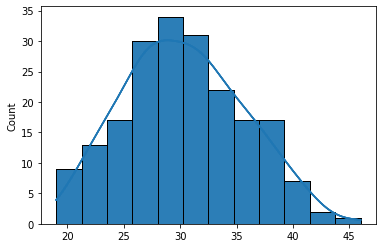

In [34]:
# DEBUG data distributions test  Simul  Variable quantitatives

# Choisir une distrubution Test 
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Loi Normale 
#np.random.normal(mu, sigma, 1000) https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# data= np.random.normal(0, 1, 100) ; label="Loi Normale Centrée Réduite" 
# data= np.random.normal(80, 9, 6000) ; label="Loi Normale N6000"
from random import gauss
# data = [gauss(100,15) for i in range(300)] ; label="Loi Gauss N300"
# data = [gauss(100,15) for i in range(100)]  ; label="Loi Normale N100"

#Loi Binomiale
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
n, p = 10, .5  # number of trials, probability of each trial ;
# data = np.random.binomial(n, p, 30) ; label="Loi Binon"  

#Loi de Poisson
# https://fr.wikipedia.org/wiki/Loi_de_Poisson  #https://blog.minitab.com/fr/que-sont-les-tests-de-poisson-a-un-ou-deux-echantillons#:~:text=Ces%20tests%20permettent%20d'effectuer,d'une%20loi%20de%20Poisson.
data = np.random.poisson(30, 200) ; label="Loi Poisson N13"
# data = np.random.poisson(30,1000); label="Loi Poisson N1000"


#Loi de Student
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_t.html
# data = np.random.standard_t(10, size=40)


#Distibution aléatoire 
# random.randint(low, high=None, size=None, dtype=int)  https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
# data = np.random.randint(0, high=1, size=500, dtype=int) ;label="Radom 0-1 int" 
# data = np.random.randint(-50, high=1000000, size=10, dtype=int) ;label="Radom  int" 
# data =np.random.random(50) ;label="Radom  int"
# data = np.random.randn(100) ;label="Radom  int" 

#Distribution Exponentielle 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html
# data = np.random.exponential(scale=3.0, size=50) ;label="Exponentielle"

#Distribution Pareto 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html
a, m = 3., 2.  # shape and mode
# data = (np.random.pareto(a, 100) + 1) * m ;label="Pareto"

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# print(pcolors.FAIL+"Distrution Test :"+pcolors.RESET,label)
# sns.histplot(data, kde=True)

αListe = (0.0001,0.05,0.1,0.9999)
for α in αListe :
  print(pcolors.FAIL+"Distrution Test :"+pcolors.RESET,label)
  TestNorm(data,α)

TEST alpa  0.1 %
 
Test normalité Kolmogorov-Smirnov: KstestResult(statistic=1.0, pvalue=0.0) N: 200
L'échantillon est issu d'une population normalement distribuée au risque alpha (α 0.1 %) N: 200


Test normalité Agostino’s K-squared : KstestResult(statistic=1.0, pvalue=0.0)  Echantillon de taile moyenne (>20) à grande) N: 200
La valeur de la p-value obtenue ( 0.1244 > 0.001 ') ne présupose en rien de la nature de la distribution des données.


Test normalité Shapiro-Wilk: ( 200 >50 observations !)  W: 0.9867599010467529  p-value: 0.058655865490436554 N: 200
La valeur de la p-value obtenue ( 0.0587 > 0.001 ') ne présupose en rien de la nature de la distribution des données.  Attention fiabilité ? : Trop d'observations ( 200 >50 )


Test normalité Chi square:  ( Observations >0 & Max 20% <5) res.: 185.94059405940595  p-value: 0.7375764496849605 N: 200
L'échantillon est issu d'une population normalement distribuée au risque alpha (α 0.1 %)


(0.07743707783460685, 0.039933801617491306)
T

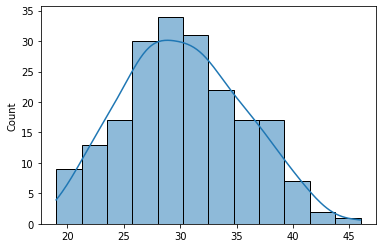

In [35]:

α = 0.001
TestNorm(data,α)


#### Test Correlation  Var Qualitative:  Test de χ² (khi2) 

In [36]:
def TableauContingence(df,Col_I,Col_II):
 """Afficher un tableau de contigence pour etudier la relation entre deux variabes qualitatives TableauContingence(df,Col_I,Col_II)   
 df : DataFrame   "Col_I" : Colonne1  "Col_II" : Colonne2  """
 df_name = get_df_name(df)
 X = Col_I ;  Y = Col_II
 df[Col_I]

 ContTable = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total").fillna(0)
 print(pcolors.OK +"Tableau contigence : "+pcolors.RESET,"ContTable - ",df_name,"(",Col_I,"&",Col_II,")")
 print("_________________________________________________________________")

 
 df = ContTable.copy()
 df.columns=df.columns.to_flat_index() # colonnes => concatener le multi index en un index simple https://datascientyst.com/flatten-multiindex-in-pandas/
 df=df.reset_index() # Conversion Index en colonnes simples   #4074 rows × 7 columns
 
 return ContTable
 
 #  sns.heatmap(df, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu")
# https://seaborn.pydata.org/generated/seaborn.heatmap.html # https://seaborn.pydata.org/tutorial/color_palettes.html
#


In [37]:
#Test de χ² (khi2) a été réalisé dans le cas d’une corrélation entre deux variables qualitatives ;
# Test du χ2 d'indépendance 
def  Khi2Test(df,Col_I,Col_II):
 print("Khi 2")

 # Min 20 individus dans l'échantillon

 #https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2
 #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html?highlight=chi#scipy.stats.chi2_contingency
 
  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html
  # https://www.ibm.com/docs/fr/spss-statistics/SaaS?topic=statistics-tests-independence-chi-square
  # https://lms.fun-mooc.fr/asset-v1:grenoblealpes+92001+session01+type@asset+block/mod6-cap2.pdf
  

In [38]:
# test de Student 
# https://www.investopedia.com/terms/z/z-test.asp
# https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/#:~:text=The%20number%20of%20degrees%20of,in%20both%20samples%2C%20minus%20two.&text=The%20critical%20value%20can%20be%20calculated%20using%20the%20percent%20point,0.05%20(95%25%20confidence).

In [39]:
df= pd.util.testing.makeMissingDataframe()
df = reduce_mem_usage(df)

Memory usage of dataframe is 0.00MB
Memory usage after optimization is: 0.00MB
Decreased by 60.0%


In [40]:
# https://kanoki.org/2019/11/18/how-to-create-dataframe-for-testing/
df= pd.util.testing.makeMixedDataFrame()


print(df)
print("\n")

dz=TableauContingence(df,"C","A")
px.imshow(dz, text_auto=True)
# Khi2Test(df,"C","A")

   A    B   C     D         
0  0.0  0.0  foo1 2009-01-01
1  1.0  1.0  foo2 2009-01-02
2  2.0  0.0  foo3 2009-01-05
3  3.0  1.0  foo4 2009-01-06
4  4.0  0.0  foo5 2009-01-07


Tableau contigence :  ContTable -  df ( C & A )
_________________________________________________________________


liste test a voir 


*   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
*  https://fr.wikipedia.org/wiki/Test_de_Bartlett
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

* Statistical Power 
  * https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/
  * https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/
  * https://statsthinking21.github.io/statsthinking21-python/09-StatisticalPower.html
  * https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26

* Plotly 
  * https://plotly.com/python/bar-charts/
  * https://plotly.com/python-api-reference/generated/plotly.express.imshow.html

*  Test Statistiques 
 * https://help.xlstat.com/fr/6443-which-statistical-test-should-you-use
 * https://fr.wikipedia.org/wiki/Table_d%27utilisation_des_tests_statistiques
 * https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2
 * https://rplusplus.com/comment-choisir-le-bon-test-statistique/
 * Khi deux 
    * Test du χ2 d'adéquation
    * Test du χ2 d'homogénéité
      * https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html?highlight=chi#scipy.stats.chi2_contingency
    * Test du χ2 d'indépendance
    * https://fr.wikipedia.org/wiki/Test_du_%CF%87%C2%B2

  * https://www.soft-concept.com/surveymag/principaux-test-statistiques-etudes.html
  * https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-l-inf-tests.pdf
  * https://bioinfo-fr.net/tests-statistiques-suivez-lguide 



* Moyenne mobile 
  * https://stackoverflow.com/questions/56911611/python-pandas-create-cumulative-average-while-grouping-by-other-column
 * https://www.statology.org/cumulative-average-python/

 * Rolling :
   * https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/  
   * https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/ 
   * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
   * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
 * https://stackoverflow.com/questions/56911611/python-pandas-create-cumulative-average-while-grouping-by-other-column


* Power analisis :  https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/df

*   https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/df
*   https://statsthinking21.github.io/statsthinking21-python/09-StatisticalPower.html
* https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26












####  mesure Concentration : Courbe Lorentz et indice de gini

In [41]:
def Gini(array):
    """Calculate the Gini coefficient of a numpy array. 
    """
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # source : https://github.com/oliviaguest/gini
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient
# https://www.insee.fr/fr/metadonnees/definition/c1551#:~:text=L'indice%20(ou%20coefficient),indice%20de%20Gini%20est%20%C3%A9lev%C3%A9. 
# Coef Gini indicateur synthétique permettant du niveau d'inégalité d'une variable sur pop. donnée  [ 0 (égalité parfaite) - 1   situation la plus inégalitaire possible, la variable vaut 0 sur toute la pop à l’exception d’un seul individu]

In [42]:
# Courbe de Lorentz
def CourbeLorentz(data):
 ''' df.Colonne.to_numpy()  # convertir pandas.core.series.Series' to numpy.ndarray '''
 #  data = np.random.uniform(-1,0,10)
 array = data

 # Filtrer les valeurs > 0 
 filter_array = []  # Create an empty list

 for element in array: #   go through each element in array :  if the element > 0, set the value to True, otherwise False:
   if element > 0:
    filter_array.append(True)
   else:
    filter_array.append(False)

 data = array[filter_array] # Data is cleaned (all > 0 )
 #  print(data,len(data))

 n=len(data) 
 #  print(n)
 lorenz = np.cumsum(np.sort(data)) / data.sum() # tri ordre croissant et division par total pour normaliser (0-1)
 lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
 

 # Plot avec style personalisé 
 # print(plt.style.available)
 with plt.style.context("fivethirtyeight"): 
  fig, ax = plt.subplots() 
   
  xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
  x=np.linspace(0, 1, 10) ;  y=x # première bissectrice

  plt.plot(xaxis,lorenz,drawstyle='steps-post',color="green", label="Courbe Concentration")  # Courbe de Lorentz
  plt.plot(x, y, color="grey",label="Equirépartition" ) # Droite équirépartition
  
  plt.axvline(x=1, ymin=0, ymax=1, color="grey", ls='--' ,  linewidth=1)  # Barre verticale
  plt.axhline(y=1, xmin=0, xmax=1, color="grey",ls='--',  linewidth=1)  # Barre horizontale 
  

  plt.scatter(0,0.5,label="0.5" ) # Ajout d'un point 
  plt.scatter(0.5,0,label="50% population") # Ajout d'un point

  GiniTxt = "Coef Gini : " + round(Gini(array),3).astype(str)
  plt.annotate(GiniTxt,(0.1,0.5)) # Ajout d'une annotation coef Gini

  
  

  plt.ylabel('Coef')  # Titre de l'axe y

  label="population (n="+str(n)+")"
  plt.xlabel(label)  # Titre de l'axe x
  
  
  plt.xlim(0,1.1) # on limite l'axe des abscisses
  plt.ylim(0,1.1) # On limites l'axe des ordonnées
  # plt.axes().axis('equal')
  # # plt.axes().axis('equal', 'auto-adjusted data limits')

  from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
 
  ax.xaxis.set_major_locator(MultipleLocator(0.1))
  # ax.xaxis.set_major_formatter(FormatStrFormatter('%'))
  # ax.axis.set_minor_locator(MultipleLocator(0.05))
  # https://matplotlib.org/3.1.1/gallery/ticks_and_spines/major_minor_demo.html
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
  ax.yaxis.set_major_locator(MultipleLocator(0.1))

  
  plt.legend()
  # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

  plt.title('Courbe Lorentz')
  
  plt.savefig("Courbe Lorentz.png", dpi=300)
  plt.show()
  
  AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
  S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
  GiniCoef = 2*S
  print(pcolors.OK +"Coef Gini :"+pcolors.RESET,Gini(data))

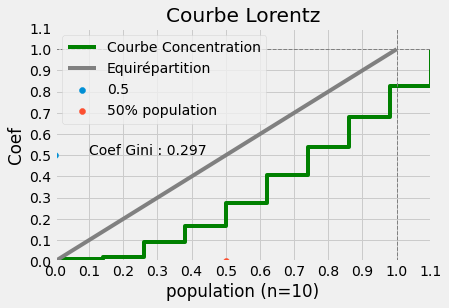

Coef Gini : 0.29683956395223327


In [43]:
data = np.random.uniform(0,10,10)

CourbeLorentz(data)


##### Test Lorentz & Gini

In [44]:
a = np.zeros((1000))   # dervait tendre vers 1 
a[0] = 1.0
# a
Gini(a)

0.998900109989001

In [45]:
s = np.random.uniform(-1,0,1000)  # devrait être proche 0.33
# s
Gini(s)

0.3289725177939081

In [46]:
b = np.ones((10)) ;b # # dervait tendre vers 0
Gini(b)

3.552713323529169e-17

###  Exports

#### Export DataFrame Excel /CSV :   ExportDF(df,file_name) 

In [47]:
def ExportDF(df,file_name):
 """ ExportXLS(df,file_name)   DataFrame et Nom du fichier  
  Format Excel :  .xlsx     ou Format CSV .csv (utF8 - separateur ;)
 le fichier est stocké à la racine du projet (machine virtuelle pour Google Colab)   """
 import re
 df_name = get_df_name(df)  # DataFrame Name 
 testCSV=re.search('.csv', file_name) != None # True si file_name contient re.search # print(test)
 testXLS=re.search('.xls', file_name) != None # True si file_name contient re.search # print(test)

 # Specify the name of the file ( .xlx for Excel or .csv for text format)
 # file_name = 'Output.xlsx'
 if testCSV == True :
  df.to_csv(file_name, encoding='utf-8') # saving CSV
  print("Confirmation : ", df_name,"exporté sous :",file_name)
  # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
  
 elif testXLS == True :
  df.to_excel(file_name) # saving the excelsheet 
  # df.to_excel(file_name,sheet_name='Sheet1') # saving the excelsheet 
  print("Confirmation : ", df_name,"exporté sous :",file_name) 
  # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html
  
 else :
   print("Erreur convertion : ", df_name,'en :',file_name," vérifier le format du fichier .xls .xlsx  ou .csv")


# Ajouter Fonction  to html : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_html.html?highlight=to_#pandas-dataframe-to-html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_clipboard.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_xml.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html


In [48]:
#test 
# ExportDF(df,"test.xlsx")

###### Export Foction en cours de dev 

In [49]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

# df = pd.DataFrame(np.random.random((10,3)), columns = ("col 1", "col 2", "col 3"))

# #https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
# fig, ax =plt.subplots(figsize=(12,4))
# ax.axis('tight')
# ax.axis('off')
# the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')

# #https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
# pp = PdfPages("foo.pdf")
# pp.savefig(fig, bbox_inches='tight')
# pp.close()
# Complement : https://stackoverflow.com/questions/33155776/export-pandas-dataframe-into-a-pdf-file-using-python

In [50]:
# import pandas as pd
# import pdfkit as pdf
# import sqlite3

# con=sqlite3.connect("baza.db")

# df=pd.read_sql_query("select * from dobit", con)
# df.to_html('/home/linux/izvestaj.html')
# nazivFajla='/home/linux/pdfPrintOut.pdf'
# pdf.from_file('/home/linux/izvestaj.html', nazivFajla)

In [51]:
# !pip install weasyprint
# #  Create a pandas dataframe with demo data:
# import pandas as pd
# demodata_csv = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
# df = pd.read_csv(demodata_csv)

# # Pretty print the dataframe as an html table to a file
# intermediate_html = '/tmp/intermediate.html'
# to_html_pretty(df,intermediate_html,'Iris Data')
# # if you do not want pretty printing, just use pandas:
# # df.to_html(intermediate_html)

# # Convert the html file to a pdf file using weasyprint
# import weasyprint
# out_pdf= '/tmp/demo.pdf'
# weasyprint.HTML(intermediate_html).write_pdf(out_pdf)

# # This is the table pretty printer used above:

# def to_html_pretty(df, filename='/tmp/out.html', title=''):
#     '''
#     Write an entire dataframe to an HTML file
#     with nice formatting.
#     Thanks to @stackoverflowuser2010 for the
#     pretty printer see https://stackoverflow.com/a/47723330/362951
#     '''
#     ht = ''
#     if title != '':
#         ht += '<h2> %s </h2>\n' % title
#     ht += df.to_html(classes='wide', escape=False)

#     with open(filename, 'w') as f:
#          f.write(HTML_TEMPLATE1 + ht + HTML_TEMPLATE2)

# HTML_TEMPLATE1 = '''
# <html>
# <head>
# <style>
#   h2 {
#     text-align: center;
#     font-family: Helvetica, Arial, sans-serif;
#   }
#   table { 
#     margin-left: auto;
#     margin-right: auto;
#   }
#   table, th, td {
#     border: 1px solid black;
#     border-collapse: collapse;
#   }
#   th, td {
#     padding: 5px;
#     text-align: center;
#     font-family: Helvetica, Arial, sans-serif;
#     font-size: 90%;
#   }
#   table tbody tr:hover {
#     background-color: #dddddd;
#   }
#   .wide {
#     width: 90%; 
#   }
# </style>
# </head>
# <body>
# '''

# HTML_TEMPLATE2 = '''
# </body>
# </html>
# '''

# https://stackoverflow.com/questions/33155776/export-pandas-dataframe-into-a-pdf-file-using-python?newreg=2926175bf7ab431a87ec344c0fb5e967

#### Export Plolty to HTML :   ExportPlotly(fig,file_name) 

In [52]:
# Exporte un figure plotly (fig) au format HTML :  file_name.html
def ExportPlotly(fig,file_name):
 """ExportPlotly(fig,file_name)
 Exporte une figure plotly (fig) au format HTML (file_name.html)
 le fichier est stocké à la racine du projet (machine virtuelle pour Google Colab)   """

 file_name = file_name+".html"
 fig.write_html(file_name)
 print(file_name,"exporté dans le répertoire racine")

In [53]:
# Push to gihub en Test : https://gist.github.com/avullo/b8153522f015a8b908072833b95c3408

#### Wordcloud  A completer

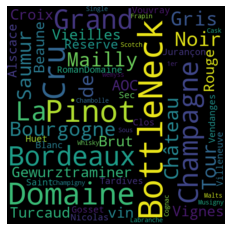

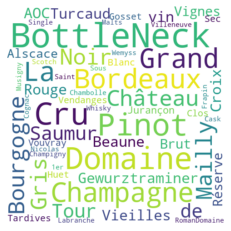

In [54]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

# Create a list of word
text="BottleNeck BottleNeck BottleNeck  BottleNeck  BottleNeck   vin champagne AOC Bordeaux Bordeaux Bourgogne Bourgogne Gewurztraminer Grand Cru Château Turcaud Bordeaux Rouge Domaine La Croix    Beaune Vieilles Vignes Champagne Mailly Grand Cru  Mailly Grand Cru Brut Réserve Alscace Jurançon Pinot Gris Vendanges Tardives Sec Pinot Gris Champagne Gosset  Pinot Noir Domaine Huet Vouvray Saumur Blanc Clos RomanDomaine Saint-Nicolas Château de Villeneuve Saumur-Champigny Domaine Labranche Pinot Noir Sous La Tour Chambolle-Musigny 1er Cru  Wemyss Malts Single Cask Scotch Whisky Domaine de La Tour Cognac Frapin" #+Global.query("post_title != 0").post_title.values
text
# text

# # Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
wordcloudWhite = WordCloud(width=480, height=480, margin=0, background_color="white").generate(text)



# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


plt.imshow(wordcloudWhite, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#WordCloud Tuto
#https://re-thought.com/creating-wordclouds-in-python/
#https://www.datacamp.com/tutorial/wordcloud-python 
# https://www.datacamp.com/tutorial/wordcloud-python
# https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/

#### DistributionHist(df,col)

In [55]:
def DistributionHist(df,col): 
 df.sort_values(col, ascending=True, inplace=True)
 fig = px.histogram(df, x=col,
            marginal='box',     #'rug', 'box', 'violin', or 'histogram'
            hover_data=df.columns ,text_auto=True,
            title="Distribution "+ col)
  
 return fig.show()

### Graphes

#### DistributionHist(df,col)

In [56]:
def DistributionHist(df,col): 
 import plotly.express as px
 df.sort_values(col, ascending=True, inplace=True)
 fig = px.histogram(df, x=col,
            marginal='box',     #'rug', 'box', 'violin', or 'histogram'
            hover_data=df.columns ,text_auto=True,
            title="Distribution "+ col)
  
 return fig.show()

#### OutlierBoxplot(df,col)

In [57]:
def OutlierBoxplot(df,col): 
 import plotly.express as px
 fig = px.box(data_frame=df, x=col, y=None, 
          color=None, 
          facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, 
          hover_name=None, hover_data=df.columns, 
          custom_data=None, 
          animation_frame=None, animation_group=None, 
          category_orders=None, labels=None, 
          color_discrete_sequence=None, 
          color_discrete_map=None, 
          orientation="h", 
          boxmode="overlay", #['group', 'overlay']
          log_x=False, log_y=False, range_x=None, 
          range_y=None, points='suspectedoutliers', # ['all', 'outliers', 'suspectedoutliers', False]
          notched=True,
          title="Répartition "+col+" et visualisation des Outliers potentiels", template=None,
          width=None, height=None)

 return fig.show()